In [1]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 가우시안 정규분포

자연현상에서 나타나는 숫자를 확률 모형으로 모형화할때 가장 많이 사용되는 확률모형이다.

### 정규분포의 시뮬레이션

In [5]:
#평균 = 0 , 표준편차 =1
mu = 0
std = 1
rv = stats.norm(mu, std)
rv

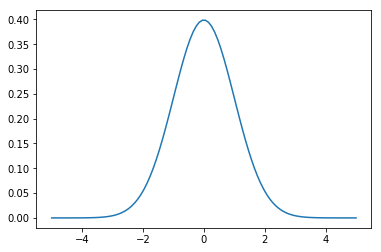

In [6]:
xx = np.linspace(-5,5,100)
plt.plot(xx,rv.pdf(xx))

In [7]:
#시뮬레이션
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

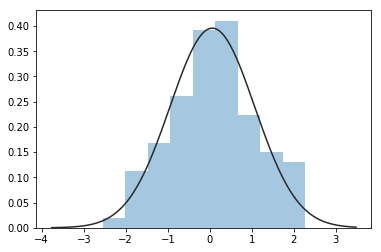

In [9]:
sns.distplot(x, kde=False, fit=stats.norm)

# Q-Q 플롯

정규 분포는 여러가지 연속 확률 분포 중에서도 가장 유용한 특성을 지니며 널리 사용되는 확률 분포이다. 따라서 어떤 확률 변수의 분포가 정규 분포인지 아닌지 확인하는 정규 분포 검정(normality test)은 가장 중요한 통계적 분석 중의 하나이다. 그러나 구체적인 정규 분포 검정을 사용하기에 앞서 시각적으로 간단하게 정규 분포를 확인하는 Q-Q 플롯을 사용할 수 있다.

In [10]:
# 정규분포를 따르는 100개의 수 생성
np.random.seed(0)
x = np.random.randn(100)

(-2.7082416219129732,
 2.7082416219129732,
 -2.809925965354195,
 2.842669324088366)

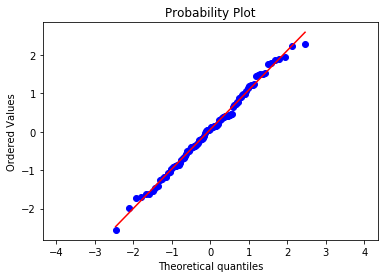

In [14]:
stats.probplot(x,plot=plt)
plt.axis('equal')

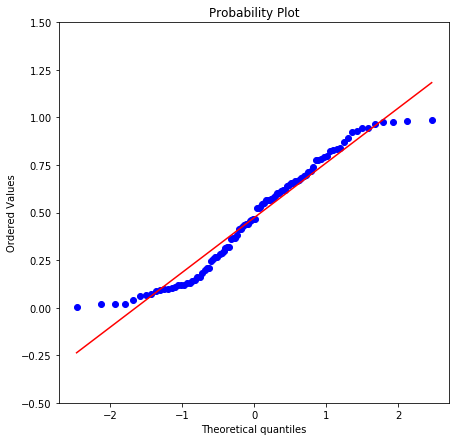

In [17]:
#정규분포를 따르지 않는 100개의 수
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7,7))
stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

# 중심 극한 정리

실세계에서 발생하는 현상 중 많은 것들이 정규 분포로 모형화 가능하다. 그 이유 중의 하나는 다음과 같은 중심 극한 정리(Central Limit Theorem)이다. 중심 극한 정리는 어떤 분포를 따르는 확률 변수든 간에 해당 확률 변수가 복수인 경우 그 합은 정규 분포와 비슷한 분포를 이루는 현상을 말한다.

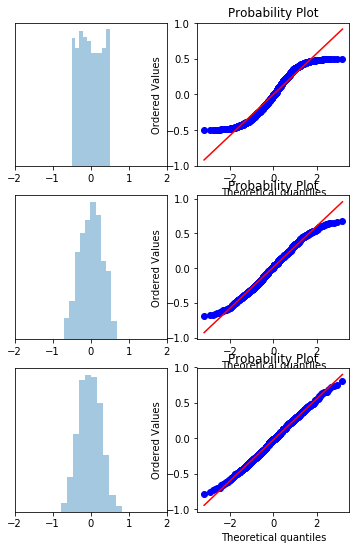

In [18]:
# 시물레이션
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6,9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(1000, N) - 0.5
    S = X.sum(axis=1)/np.sqrt(N)
    plt.subplot(3, 2, 2*i+1)
    sns.distplot(S, bins=10, kde=False, norm_hist=True)
    plt.xlim(-2, 2)
    plt.yticks([])
    plt.subplot(3, 2, 2*i+2)
    stats.probplot(S, plot=plt)

# 스튜던트 t 분포

### Fat tail 현상

데이터 분석 실무에서는 자연에서 발생하는 현상 중 많은 것들을 정규 분포를 따르는 확률 변수로 모형화하여 사용하고 있다. 그러나 이러한 데이터들을 자세히 살펴보면 실제로는 정규분포보다 양 끝단의 비중이 더 큰것을 알 수 있다. 이를 fat tail 현상이라고 한다.

_ _

스튜던트 t 분포의 확률 밀도 함수는 다음 수식에 의해 정의된다. 가우시안 정규 분포와 달리 정수값을 가지는 자유도(degree of freedom)라는 모수(parameter) $\nu$를 추가적으로 가진다.

$$ t(x;\mu, \sigma^2, \nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)} {\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{(x-\mu)^2}{\nu\sigma^2} \right)^{-\frac{\nu+1}{2}} $$


이 식에서 $\Gamma$는 감마(Gamma) 함수라는 특수 함수이다.

$$ \Gamma(x) = \int_0^\infty  u^{x-1} e^{-u} du $$

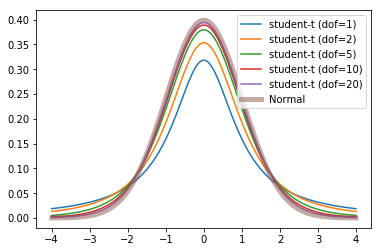

In [27]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("student-t (dof=%d)" % df))
plt.plot(xx, stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.legend()

그림에서 자유도  νν 가 작으면 가우시안 정규 분포보다 분산이 크고 fat tail을 보이지만 자유도가 증가할수록 가우시안 정규 분포로 수렴하는 것을 볼 수 있다.

## 정규 분포의 샘플 평균이 이루는 분포

중심 극한 정리(Central Limit Theorem)에 따르면 모든 확률 변수의 합(또는 평균)은 샘플의 갯수가 증가할 수록 가우시안 정규 분포에 가까워진다.
그러면 샘플의 수가 무한대가 아닌 유한한 경우는 어떨까? 

가우시안 정규 분포로부터 얻은 $n$개의 샘플 $x_1, \cdots, x_n$ 로부터 얻은 **샘플 평균을 샘플 표준편차로 정규화한 값**은 자유도가 $n-1$인 스튜던트 t 분포를 이룬다.

여기에서 중요한 포인트는 샘플 표준편차로 정규화 하였다는 점이다. 정규 분포로 부터 얻은 샘플 데이터의 샘플 평균은 그 자체로는 항상 정규 분포를 따르지만 샘플 표준편차라고 하는 다른 확률 변수로 나누는 과정에서 정규 분포가 아닌 스튜던트 t분포를 따르게 된다.

이를 수식으로 나타내면 다음과 같다.

이론적 표준 편차라는 상수로 정규화한 샘플 평균은 정규 분포를 따른다.

$$  \frac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{n}}} \sim \mathcal{N}(x; 0, 1) $$

하지만 샘플 평균을 샘플 분산으로 정규화한 값은 스튜던트 t 분포를 따른다.

$$  \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} \sim t(x; 0, 1, n - 1) $$

이 식에서 $ \bar{x}, s$은 각각 샘플 평균, 샘플 표준편차다.

$$ \bar{x} = \frac{x_1+\cdots+x_n}{n}  $$

$$ s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 $$

이 정리는 추후 정규 분포의 기댓값에 관한 각종 검정(testing)에서 사용된다.

다음은 시뮬레이션을 사용하여 샘플 표준 편차로 정규화한 샘플 평균과 정규 분포를 비교한 것이다. 왼쪽은 $N=4$, 오른쪽은 $N=40$인 경우이다.

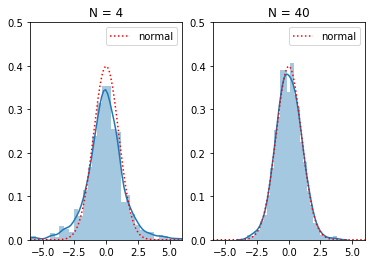

In [28]:
np.random.seed(0)

rv = stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 4")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 40")
plt.legend()